# **Table of Contents**

1. **Introduction**  
   1.1 Brief explanation of the project  
   1.2 Objective of the CNN model  
   1.3 Overview of the dataset  

2. **Importing Necessary Libraries**  
   2.1 Loading required Python libraries  

3. **Dataset Setup**  
   3.1 Paths to the dataset directories  
   3.2 Explanation of folder structure  

4. **Visualizing the Dataset**  
   4.1 Plot class distribution (bar charts)  
   4.2 Display random sample images  

5. **Data Preprocessing and Augmentation**  
   5.1 Using ImageDataGenerator for preprocessing  
   5.2 Data augmentation for training  

6. **Building the CNN Model**  
   6.1 CNN architecture  
   6.2 Compiling the model  

7. **Callbacks for Training**  
   7.1 EarlyStopping to prevent overfitting  
   7.2 ReduceLROnPlateau for learning rate adjustment  

8. **Training the Model**  
   8.1 Model training using `fit()`  
   8.2 Monitoring training and validation loss/accuracy  

9. **Visualizing Training Performance**  
   9.1 Plot training and validation accuracy  
   9.2 Plot training and validation loss  

10. **Model Evaluation**  
    10.1 Generating predictions on the validation dataset  
    10.2 Confusion Matrix for classification results  
    10.3 Precision, Recall, and F1-Score  

11. **Conclusion**  
    11.1 Summary of results  
    11.2 Observations from the evaluation metrics  

In [14]:
# Importing necessary libraries
import os
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPooling2D, Dropout,
    Flatten, Activation, BatchNormalization, Input
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    f1_score, ConfusionMatrixDisplay
)
warnings.filterwarnings("ignore")

In [15]:
# Paths to your image directories
train_dir = './CT_Images/Train'         # Path to training images folder
validation_dir = './CT_Images/Test'  # Path to validation images folder

Class Distribution in Training Data:


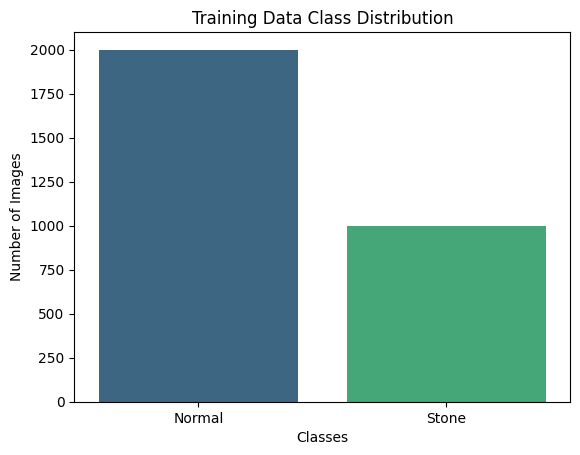

Class Distribution in Validation Data:


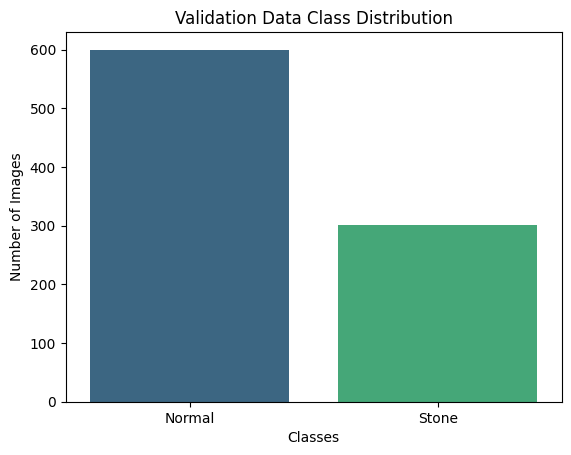

Sample Images from Training Data:


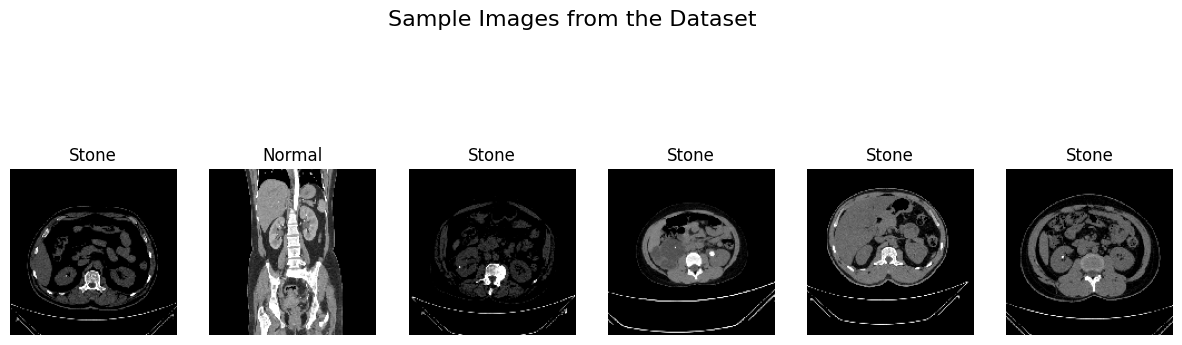

In [16]:
# Function to visualize a few images from the dataset
def show_sample_images(directory, num_images=6):
    """
    Display random sample images from the dataset folder.
    """
    categories = os.listdir(directory)  # List of subfolders (classes)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle("Sample Images from the Dataset", fontsize=16)
    
    for i in range(num_images):
        # Randomly select a category and an image
        category = np.random.choice(categories)
        category_path = os.path.join(directory, category)
        image_name = np.random.choice(os.listdir(category_path))
        image_path = os.path.join(category_path, image_name)
        
        # Load and plot the image
        img = load_img(image_path, target_size=(150, 150))
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(category)
        
    plt.show()

# Visualization: Class Distribution
def plot_class_distribution(directory, title):
    """
    Plot the distribution of classes in a directory.
    """
    class_counts = {}
    for category in os.listdir(directory):
        class_counts[category] = len(os.listdir(os.path.join(directory, category)))
    
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.show()

# Visualize Training and Validation Data
print("Class Distribution in Training Data:")
plot_class_distribution(train_dir, "Training Data Class Distribution")

print("Class Distribution in Validation Data:")
plot_class_distribution(validation_dir, "Validation Data Class Distribution")

print("Sample Images from Training Data:")
show_sample_images(train_dir)


In [3]:
# ImageDataGenerator for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,       # Rescaling pixel values
    shear_range=0.2,         # Shear augmentation
    zoom_range=0.2,          # Zoom augmentation
    horizontal_flip=True     # Flip augmentation
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [4]:
# Generating training data from directory
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary classification: labels (0 or 1)
)

# Generating validation data from directory
validation_generator = validation_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary classification: labels (0 or 1)
)


Found 3000 images belonging to 2 classes.
Found 901 images belonging to 2 classes.


In [5]:
# Building the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),  # Input layer

    # First convolutional block
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')  # Single neuron + sigmoid for binary classification
])

In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy']
)

# Callbacks to avoid overfitting
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    steps_per_epoch=len(train_generator),
    callbacks=callbacks
)

# Model summary
model.summary()

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 93s 968ms/step - accuracy: 0.7927 - loss: 0.5492 - val_accuracy: 0.5716 - val_loss: 0.7074 - learning_rate: 0.0010
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 88s 936ms/step - accuracy: 0.9537 - loss: 0.1179 - val_accuracy: 0.3341 - val_loss: 2.5536 - learning_rate: 0.0010
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 872ms/step - accuracy: 0.9729 - loss: 0.0807 - val_accuracy: 0.5205 - val_loss: 1.6118 - learning_rate: 0.0010
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 109us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 84s 895ms/step - accuracy: 0.9836 - loss: 0.0489 - val_accuracy: 0.8524 - val_loss: 0.4120 - learning_rate: 0.0010
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃                 ┃ Output     ┃ Param ┃
┃ Layer (type)    ┃ Shape      ┃     # ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ conv2d (Conv2D) │ (None,     │   896 │
│                 │ 148, 148,  │       │
│                 │ 32)        │       │
├─────────────────┼────────────┼───────┤
│ batch_normaliz… │ (None,     │   128 │
│ (BatchNormaliz… │ 148, 148,  │       │
│                 │ 32)        │       │
├─────────────────┼────────────┼───────┤
│ max_pooling2d   │ (None, 74, │     0 │
│ (MaxPooling2D)  │ 74, 32)    │       │
├─────────────────┼────────────┼───────┤
│ conv2d_1        │ (None, 72, │ 18,4… │
│ (Conv2D)        │ 72, 64)    │       │
├─────────────────┼────────────┼───────┤
│ batch_normaliz… │ (None, 72, │   256 │
│ (BatchNormaliz… │ 72, 64)    │       │
├─────────────────┼────────────┼───────┤
│ max_pooling2d_1 │ (None, 36, │     0 │
│ (MaxPooling2D)  │ 36, 64)    │       │
├─────────────────┼────────────┼───────┤
│ flatten         │ (None,     │     0 │
│ (Flatten)       │ 82944)     │       │
├─────────────────┼────────────┼───────┤
│ dense (Dense)   │ (None,     │ 10,6… │
│                 │ 128)       │       │
├─────────────────┼────────────┼───────┤
│ batch_normaliz… │ (None,     │   512 │
│ (BatchNormaliz… │ 128)       │       │
├─────────────────┼────────────┼───────┤
│ dropout         │ (None,     │     0 │
│ (Dropout)       │ 128)       │       │
├─────────────────┼────────────┼───────┤
│ dense_1 (Dense) │ (None, 1)  │   129 │
└─────────────────┴────────────┴───────┘

 Total params: 31,911,237 (121.73 MB)

 Trainable params: 10,636,929 (40.58 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 21,273,860 (81.15 MB)

<function matplotlib.pyplot.show(close=None, block=None)>

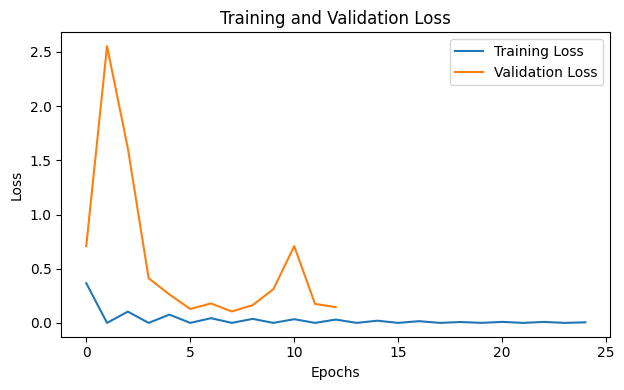

In [7]:
plt.figure(figsize=(12, 4))
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show

In [10]:
# Evaluate model on validation data
Y_pred = model.predict(validation_generator)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# True labels from the generator
Y_true = validation_generator.classes

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step


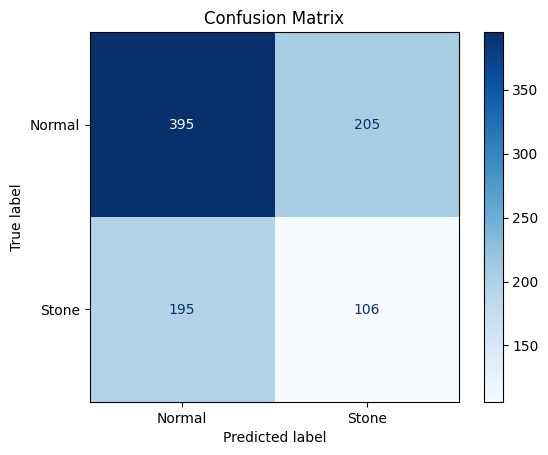

In [11]:
# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Stone'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()